# Initial Data Exploration

## Dataset Description

| Column | Type | Discription | 
| ----- | ------- | ---------- |
| reference | str | First item from the pair | 
| ref_tox | float | toxicity level of reference text | 
| translation | str | Second item from the pair - paraphrazed version of the reference|
| trn_tox | float | toxicity level of translation text |
| similarity | float | cosine similarity of the texts |
| lenght_diff | float | relative length difference between texts |

## 1. Importing Libraries

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 2. Importing Dataset 

In [2]:
dataset = pd.read_csv('../data/raw/filtered_paramnt/filtered.tsv', delimiter='\t', quoting=3, index_col=0)

In [3]:
dataset.head()

,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,"If Alkar is flooding her with psychic waste, t...","if Alkar floods her with her mental waste, it ...",0.785171,0.010309,0.014195,0.981983
1,Now you're getting nasty.,you're becoming disgusting.,0.749687,0.071429,0.065473,0.999039
2,"Well, we could spare your life, for one.","well, we can spare your life.",0.919051,0.268293,0.213313,0.985068
3,"Ah! Monkey, you've got to snap out of it.","monkey, you have to wake up.",0.664333,0.309524,0.053362,0.994215
4,I've got orders to put her down.,I have orders to kill her.,0.726639,0.181818,0.009402,0.999348


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 577777 entries, 0 to 577776
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reference    577777 non-null  object 
 1   translation  577777 non-null  object 
 2   similarity   577777 non-null  float64
 3   lenght_diff  577777 non-null  float64
 4   ref_tox      577777 non-null  float64
 5   trn_tox      577777 non-null  float64
dtypes: float64(4), object(2)
memory usage: 30.9+ MB


In [5]:
dataset.describe()

,similarity,lenght_diff,ref_tox,trn_tox
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.157652,0.541372,0.434490
std,0.092695,0.108057,0.457571,0.458904
min,0.600001,0.000000,0.000033,0.000033
25%,0.681105,0.066667,0.012171,0.000707
50%,0.754439,0.141791,0.806795,0.085133
75%,0.831244,0.238095,0.990469,0.973739
max,0.950000,0.400000,0.999724,0.999730


## 3. Data Visualization

<Axes: xlabel='similarity', ylabel='Density'>

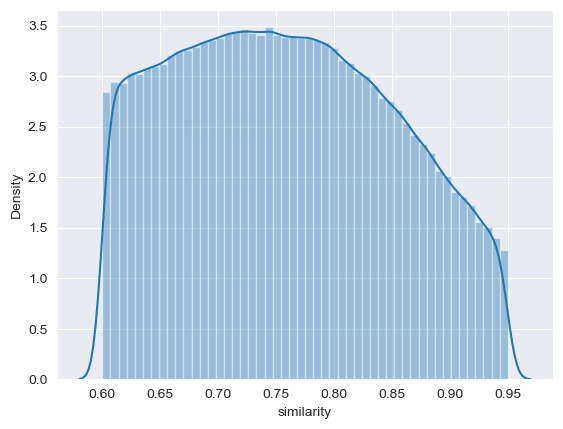

In [7]:
sns.distplot(dataset['similarity'])

<Axes: xlabel='lenght_diff', ylabel='Density'>

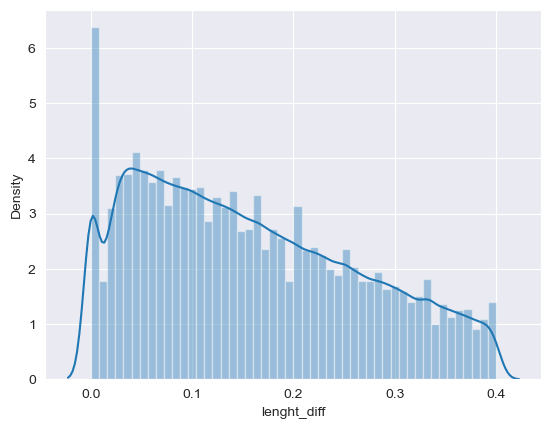

In [8]:
sns.distplot(dataset['lenght_diff'])

<Axes: xlabel='ref_tox', ylabel='Density'>

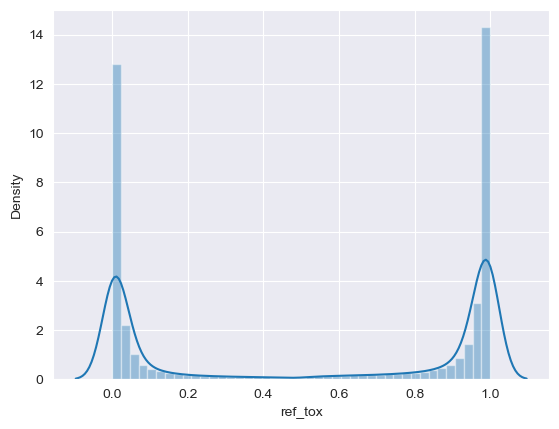

In [9]:
sns.distplot(dataset['ref_tox'])

<Axes: xlabel='trn_tox', ylabel='Density'>

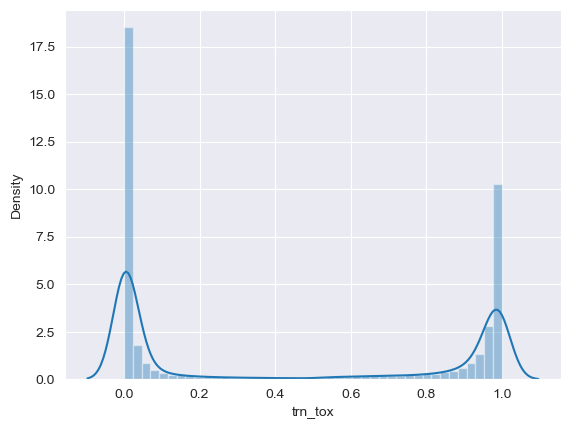

In [10]:
sns.distplot(dataset['trn_tox'])

## 4. Distribution of words by length

In [45]:
all_sentences = dataset['reference'].tolist() + dataset['translation'].tolist()
all_words = []
for sent in all_sentences:
    all_words.extend(sent.split())

In [46]:
all_words = set(all_words)

In [47]:
len(all_words)

327559

In [48]:
words_lengths = list(map(len, all_words))
unique_lengths = sorted(list(set(words_lengths)))[:30]

In [49]:
len(unique_lengths)

30

In [50]:
lengths_count = [words_lengths.count(l) for l in unique_lengths]

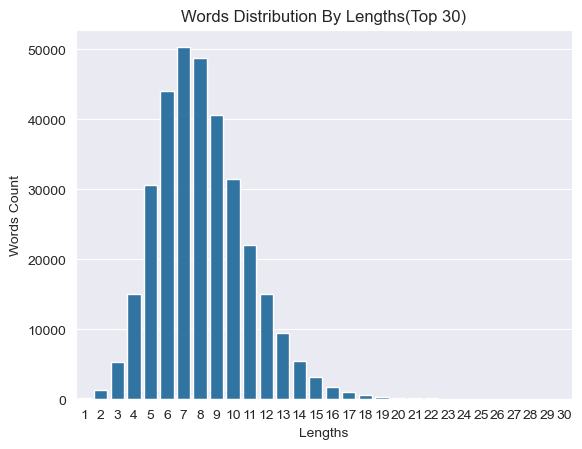

In [51]:
ax = sns.barplot(x=unique_lengths, y=lengths_count)

ax.set_xlabel('Lengths')
ax.set_ylabel('Words Count')
ax.set_title('Words Distribution By Lengths(Top 30)')

plt.show()

Here, we see that most of the words have length between 6 and 10.

## 5. Distribution of sentences by length

In [52]:
sent_lengths = list(map(len, all_sentences))
unique_sent_lengths = sorted(list(set(sent_lengths)))[:100]

In [53]:
len(unique_sent_lengths)

100

In [54]:
sent_lengths_count = [sent_lengths.count(l) for l in unique_sent_lengths]

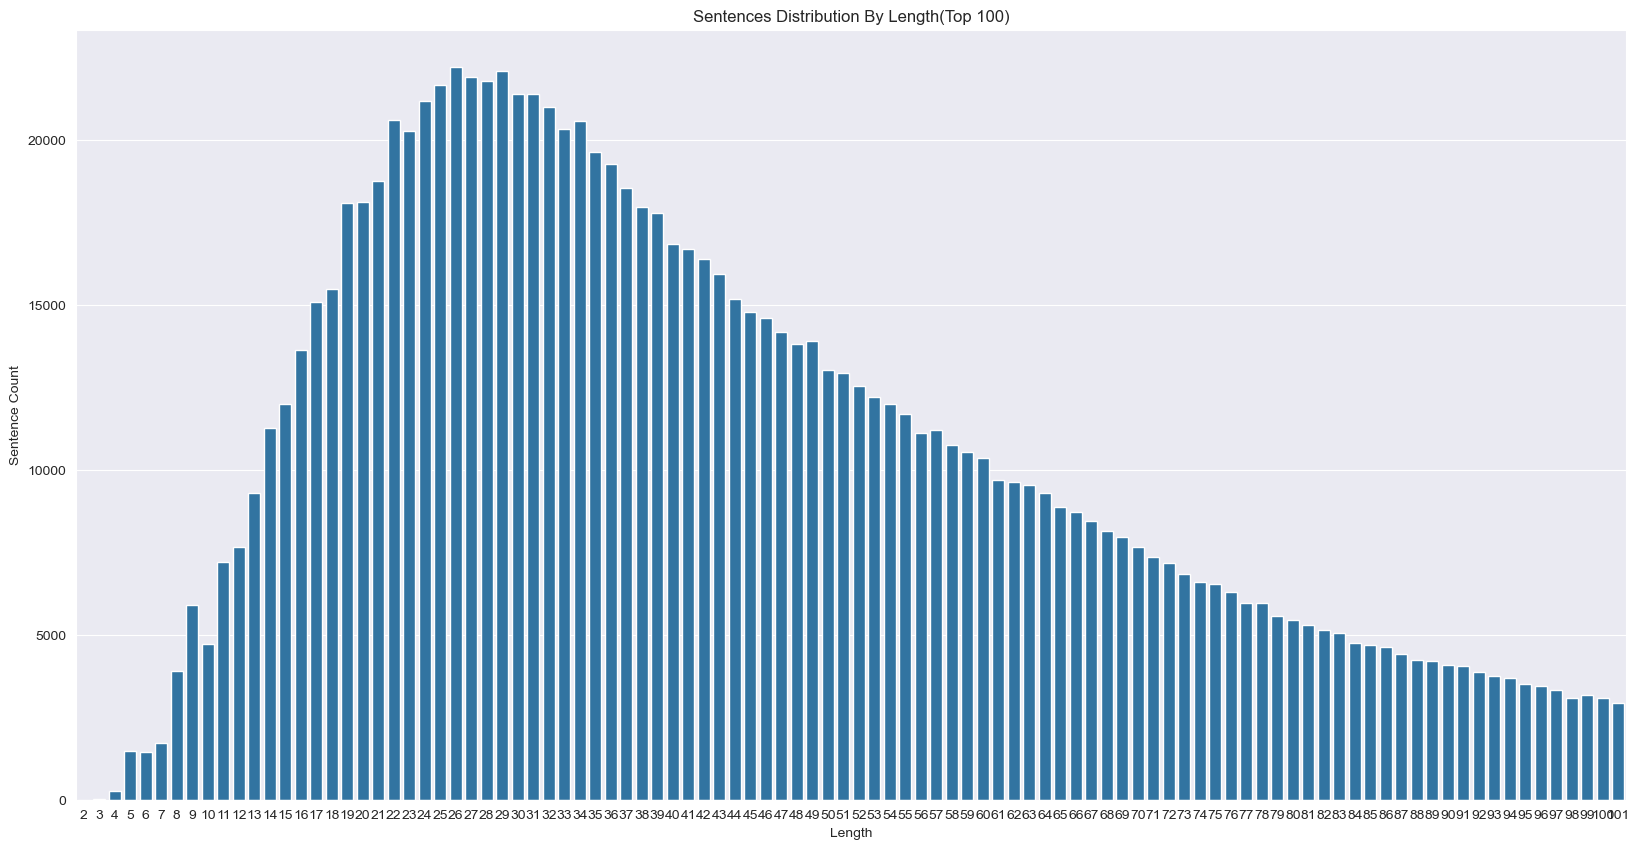

In [55]:
plt.figure(figsize=(20, 10))

ax = sns.barplot(x=unique_sent_lengths, y=sent_lengths_count)

ax.set_title("Sentences Distribution By Length(Top 100)")
ax.set_xlabel("Length")
ax.set_ylabel("Sentence Count")

plt.show()